In [2]:
from ipywidgets import widgets, Layout
import os
import warnings
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'jupyterlab'
pio.templates.default = "plotly_dark"
warnings.simplefilter(action='ignore')
import itertools

In [3]:
rain = pd.read_csv(r'../data/processedfiles/rainfall-by-region.csv')
regions = list(rain.columns.values)[5:]
years = list(rain['year'].unique())
monsoon_list = [i for i in range(150, 281)]
rain_monsoon = rain[rain['day-number'].isin(monsoon_list)]

In [4]:
rain.isnull().sum()

year                  0
day-number            0
date                  0
month                 0
day-of-month          0
ajmer              1127
alwar               765
banswara            370
baran             12418
barmer             5511
bharatpur           824
bhilwara            367
bikaner            2195
bundi               399
chittorgarh         733
churu               429
dausa              4480
dholpur           10227
dungarpur           369
hanumangarh       13514
jaipur              370
jaisalmer           370
jalore              370
jhunjhunu           370
jodhpur             369
karoli            14975
kota               7306
nagaur              370
pali                401
pratapgarh        18627
rajsamand         12814
sawai madhopur     5849
sikar                35
sirohi                4
ganganagar          370
tonk               1466
udaipur               5
aw                    1
bshw                  1
cwq                 368
bwhw                369
sub humid       

In [5]:
rain[rain['sirohi'].isnull()]

,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4076,1968,60,1968-02-29,2,29,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [17]:
sirohi=rain.iloc[:,[0,1,2,3,4,33]]

In [19]:
sirohi.head()

,year,day-number,date,month,day-of-month,sirohi
0,1957,1,1957-01-01,1,1,0.0
1,1957,2,1957-01-02,1,2,0.0
2,1957,3,1957-01-03,1,3,0.0
3,1957,4,1957-01-04,1,4,0.0
4,1957,5,1957-01-05,1,5,0.0


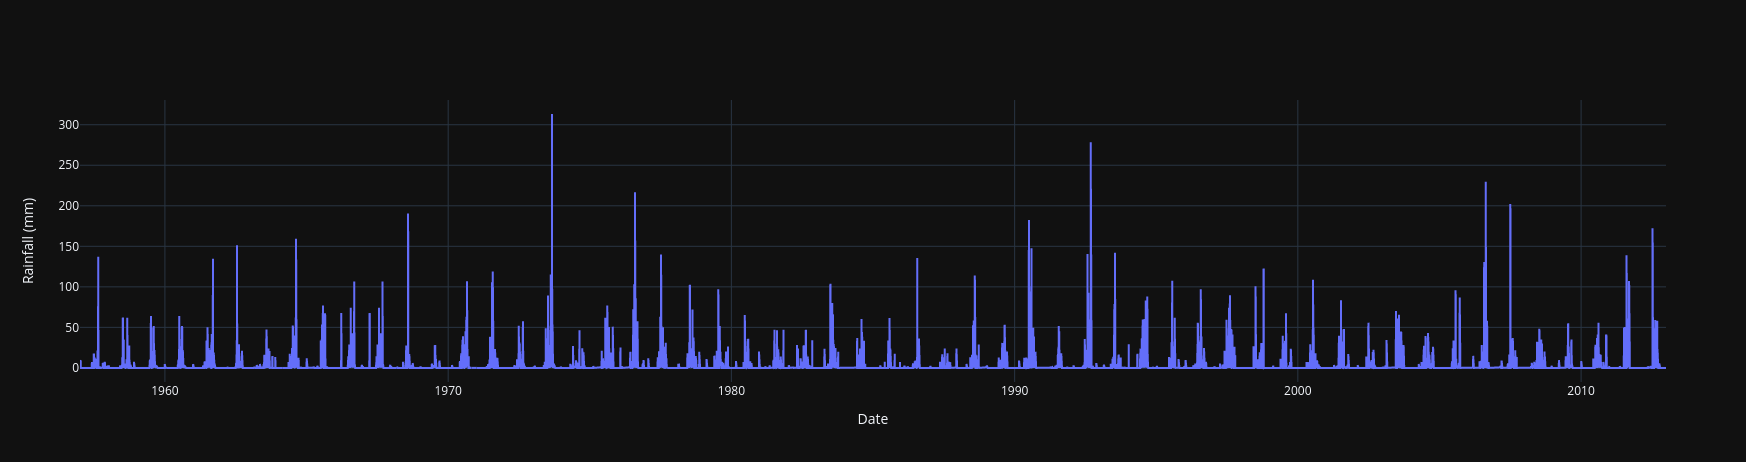

In [25]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=sirohi['date'],y=sirohi['sirohi']))
fig.update_layout(xaxis_title='Date',yaxis_title='Rainfall (mm)')
fig.show()